In [0]:
import networkx as nx 
import pandas as pd
import io
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from itertools import product
import math

In [0]:
from google.colab import files
uploaded = files.upload()

Saving restaurants-casvp.csv to restaurants-casvp (1).csv


In [0]:
df = pd.read_csv(io.BytesIO(uploaded['restaurants-casvp.csv']), sep = ';')

In [0]:
#Firstly we need to divide our tt columns to 2 columns called x_coor and y_coor
df[['x_coor','y_coor']] = df.tt.str.split(",",expand=True,)

In [0]:
#deleting useless columns
df = df.drop(["TYPE", "ville", "tt", "adresse", "code"], axis=1)

In [0]:
#Rename fist column (Nom restaurant)
df.rename(columns = {'Nom restaurant ':'Names'}, inplace =True)


In [0]:
df['x_coor'] = df['x_coor'].astype(float)
df['y_coor'] = df['y_coor'].astype(float)

print(df)

                 Names     x_coor    y_coor
0               VERDUN  48.876266  2.361942
1            AVE MARIA  48.852746  2.360534
2         SAINT-BLAISE  48.856360  2.406102
3                MAINE  48.829248  2.326551
4             BEAUNIER  48.824459  2.327765
5           MOUFFETARD  48.843234  2.349667
6   MARCHE DE L'EUROPE  48.877284  2.313452
7         LA QUINTINIE  48.839301  2.307180
8             AU MAIRE  48.864445  2.357714
9    JOSEPH DE MAISTRE  48.892890  2.330458
10    CLAUDE VELLEFAUX  48.876954  2.370357
11        LES ARTISTES  48.841966  2.325587
12            ARBUSTES  48.828431  2.309284
13        CAULAINCOURT  48.889552  2.339419
14    BRECHE AUX LOUPS  48.837994  2.394822
15    MADELEINE BEJART  48.859373  2.361931
16              CHANZY  48.852411  2.382525
17             NAVARIN  48.879688  2.338996
18               ARAGO  48.834785  2.345384
19          SAINT-ELOI  48.845593  2.386010
20            JOUVENET  48.842528  2.265355
21           TOURELLES  48.84515

In [0]:
# Apply K-Means clustering our data into 4 cluster
x = df.iloc[:,[1,2]].values
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

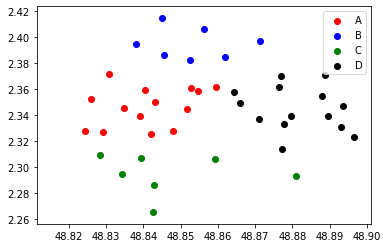

In [0]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], c = 'red', label = 'A')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], c = 'blue', label = 'B')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], c = 'green', label = 'C')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], c = 'black', label = 'D')
#Plotting the centroids of the clusters
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

In [0]:
#create 4 dataframe for cars
car_A = pd.DataFrame(columns=['Names','x_coor', 'y_coor'])
car_B = pd.DataFrame(columns=['Names','x_coor', 'y_coor'])
car_C = pd.DataFrame(columns=['Names','x_coor', 'y_coor'])
car_D = pd.DataFrame(columns=['Names','x_coor', 'y_coor'])

In [0]:
car_A

,Names,x_coor,y_coor


In [0]:
j=0
for i in y_kmeans:
  if i==0:
    car_A=car_A.append(df.iloc[j,:])
  if i==1:
    car_B=car_B.append(df.iloc[j,:])
  if i==2:
    car_C=car_C.append(df.iloc[j,:])
  if i==3:
    car_D=car_D.append(df.iloc[j,:])
  j+=1

In [0]:
print(car_A)
print('------------------------------------')
print(car_B)
print('------------------------------------')
print(car_C)
print('------------------------------------')
print(car_D)



                 Names     x_coor    y_coor
1            AVE MARIA  48.852746  2.360534
3                MAINE  48.829248  2.326551
4             BEAUNIER  48.824459  2.327765
5           MOUFFETARD  48.843234  2.349667
11        LES ARTISTES  48.841966  2.325587
15    MADELEINE BEJART  48.859373  2.361931
18               ARAGO  48.834785  2.345384
22  AU PETIT REMOULEUR  48.854622  2.358803
25             TOLBIAC  48.826031  2.352555
28       ANDRE MALRAUX  48.847869  2.327529
31           BOUTEBRIE  48.851629  2.344985
36          PORT ROYAL  48.839183  2.339248
38  JARDIN DES PLANTES  48.840346  2.359412
39             CHARCOT  48.830738  2.371272
------------------------------------
               Names     x_coor    y_coor
2       SAINT-BLAISE  48.856360  2.406102
14  BRECHE AUX LOUPS  48.837994  2.394822
16            CHANZY  48.852411  2.382525
19        SAINT-ELOI  48.845593  2.386010
21         TOURELLES  48.845159  2.415046
29  SAINTS-SIMONIENS  48.871268  2.396821
34       

In [0]:
#creating dictionary positions for all restaurants
posA=car_A.set_index('Names').T.to_dict(orient='list')
posB=car_B.set_index('Names').T.to_dict(orient='list')
posC=car_C.set_index('Names').T.to_dict(orient='list')
posD=car_D.set_index('Names').T.to_dict(orient='list')
print(posD)


{'VERDUN': [48.876266, 2.361942], "MARCHE DE L'EUROPE": [48.877284, 2.313452], 'AU MAIRE': [48.864445, 2.357714], 'JOSEPH DE MAISTRE': [48.89289, 2.330458], 'CLAUDE VELLEFAUX': [48.876954, 2.370357], 'CAULAINCOURT': [48.889552, 2.339419], 'NAVARIN': [48.879688, 2.338996], 'SAINT-SAUVEUR': [48.865929, 2.349476], 'GRAMONT': [48.870961, 2.33703], 'EPINETTES': [48.896416, 2.323344], 'CLIGNANCOURT': [48.893493, 2.347233], 'TANGER': [48.888726, 2.371022], "L'OASIS": [48.887842, 2.354807], 'TOUR DES DAMES': [48.877809, 2.33344]}


In [0]:
lst=[posA,posB,posC,posD]
for i in lst:
  for j in i.keys():
    i[j] = [x * 10000 for x in i[j]]

print(posD)

{'VERDUN': [488762.66000000003, 23619.42], "MARCHE DE L'EUROPE": [488772.84, 23134.519999999997], 'AU MAIRE': [488644.45, 23577.14], 'JOSEPH DE MAISTRE': [488928.9, 23304.58], 'CLAUDE VELLEFAUX': [488769.54, 23703.57], 'CAULAINCOURT': [488895.52, 23394.19], 'NAVARIN': [488796.88, 23389.96], 'SAINT-SAUVEUR': [488659.29000000004, 23494.760000000002], 'GRAMONT': [488709.61, 23370.3], 'EPINETTES': [488964.16000000003, 23233.440000000002], 'CLIGNANCOURT': [488934.93, 23472.33], 'TANGER': [488887.26, 23710.22], "L'OASIS": [488878.42, 23548.07], 'TOUR DES DAMES': [488778.08999999997, 23334.399999999998]}


In [0]:
# From there we don't need coordinates since we used them for K_Means, delete them
def Delete_X_and_Y_coors(df):
  df=df.drop(["x_coor","y_coor"],axis=1)
  return df

In [0]:
#Our indexes like [1,2,5,6] we should do it [0,1,2,3,4]
def reIndexColumns(df):
  df = Delete_X_and_Y_coors(df)
  df = df.reset_index(drop=True)
  return df

car_A = reIndexColumns(car_A)
car_B = reIndexColumns(car_B)
car_C = reIndexColumns(car_C)
car_D = reIndexColumns(car_D)
car_D

,Names
0,VERDUN
1,MARCHE DE L'EUROPE
2,AU MAIRE
3,JOSEPH DE MAISTRE
4,CLAUDE VELLEFAUX
5,CAULAINCOURT
6,NAVARIN
7,SAINT-SAUVEUR
8,GRAMONT
9,EPINETTES


In [0]:
def MakeCompleteGraph(df):
  df_pairs = pd.DataFrame(
      filter(lambda x: x[0]!=x[1], product(df.Names, df.Names)), 
      columns=['Names', 'dest']
  )
  return df_pairs
  
car_A = MakeCompleteGraph(car_A)
print(car_A)

         Names                dest
0    AVE MARIA               MAINE
1    AVE MARIA            BEAUNIER
2    AVE MARIA          MOUFFETARD
3    AVE MARIA        LES ARTISTES
4    AVE MARIA    MADELEINE BEJART
..         ...                 ...
177    CHARCOT             TOLBIAC
178    CHARCOT       ANDRE MALRAUX
179    CHARCOT           BOUTEBRIE
180    CHARCOT          PORT ROYAL
181    CHARCOT  JARDIN DES PLANTES

[182 rows x 2 columns]


In [0]:
#generate random numbers for weight and distances
#weight shows traffic scale in roads
def Generate_distance_and_traffic(df):
  df = MakeCompleteGraph(df)
  trafficList = []
  distanceList = []
  for i in range(len(df)):
    traffic = random.randrange(0,10)
    trafficList.append(traffic)
    distance = random.randrange(100,500)
    distanceList.append(distance)
#Adding new columns to dataframe
  df["Traffic_scale"] = trafficList
  df["Distance"] = distanceList
  return df

In [0]:
def Generate_Weight(df):
    df = Generate_distance_and_traffic(df)
    df['Weight'] = df['Traffic_scale']*20+df['Distance']
    return df

In [0]:
car_A = Generate_Weight(car_A)
car_B = Generate_Weight(car_B)
car_C = Generate_Weight(car_C)
car_D = Generate_Weight(car_D)

In [0]:
print('-------------------CAR A-----------\n')
print(car_A)
print('-------------------CAR B------------\n')
print(car_B)
print('-------------------CAR C------------\n')
print(car_C)
print('-------------------CAR D------------\n')
print(car_D)


-------------------CAR A-----------

           Names                dest  Traffic_scale  Distance  Weight
0      AVE MARIA               MAINE              2       363     403
1      AVE MARIA               MAINE              0       355     355
2      AVE MARIA               MAINE              7       196     336
3      AVE MARIA               MAINE              9       153     333
4      AVE MARIA               MAINE              4       358     438
...          ...                 ...            ...       ...     ...
30753    CHARCOT  JARDIN DES PLANTES              8       499     659
30754    CHARCOT  JARDIN DES PLANTES              0       481     481
30755    CHARCOT  JARDIN DES PLANTES              7       245     385
30756    CHARCOT  JARDIN DES PLANTES              6       408     528
30757    CHARCOT  JARDIN DES PLANTES              9       241     421

[30758 rows x 5 columns]
-------------------CAR B------------

               Names              dest  Traffic_scale  Dist

In [0]:
graph_car_A = nx.from_pandas_edgelist(car_A, source='Names', target='dest' , edge_attr='Weight')
graph_car_B = nx.from_pandas_edgelist(car_B, source='Names', target='dest' , edge_attr='Weight')
graph_car_C = nx.from_pandas_edgelist(car_C, source='Names', target='dest' , edge_attr='Weight')
graph_car_D = nx.from_pandas_edgelist(car_D, source='Names', target='dest' , edge_attr='Weight')

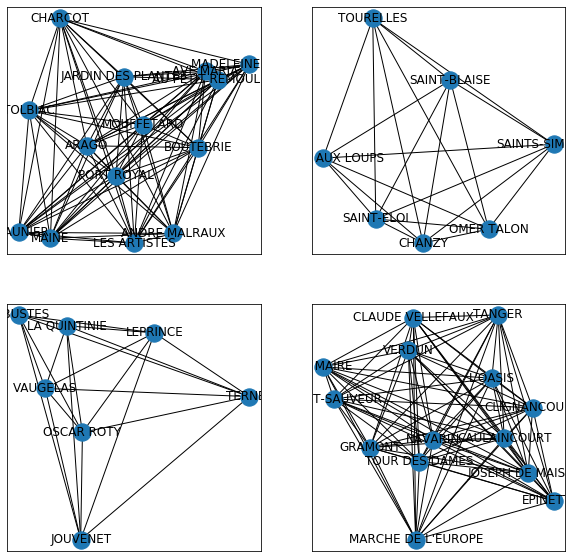

In [0]:

plt.figure(figsize=(10,10))
plt.subplot(2,2 , 1)
nx.draw_networkx(graph_car_A,posA, with_labels=True)
plt.subplot(2,2 , 2)
nx.draw_networkx(graph_car_B,posB, with_labels=True)
plt.subplot(2,2 , 3)
nx.draw_networkx(graph_car_C,posC, with_labels=True)
plt.subplot(2,2 , 4)
nx.draw_networkx(graph_car_D,posD, with_labels=True)

plt.show()

In [0]:
print(graph_car_A['AVE MARIA'])

{'MAINE': {'Weight': 338}, 'BEAUNIER': {'Weight': 599}, 'MOUFFETARD': {'Weight': 599}, 'LES ARTISTES': {'Weight': 627}, 'MADELEINE BEJART': {'Weight': 443}, 'ARAGO': {'Weight': 263}, 'AU PETIT REMOULEUR': {'Weight': 617}, 'TOLBIAC': {'Weight': 364}, 'ANDRE MALRAUX': {'Weight': 620}, 'BOUTEBRIE': {'Weight': 389}, 'PORT ROYAL': {'Weight': 272}, 'JARDIN DES PLANTES': {'Weight': 472}, 'CHARCOT': {'Weight': 178}}


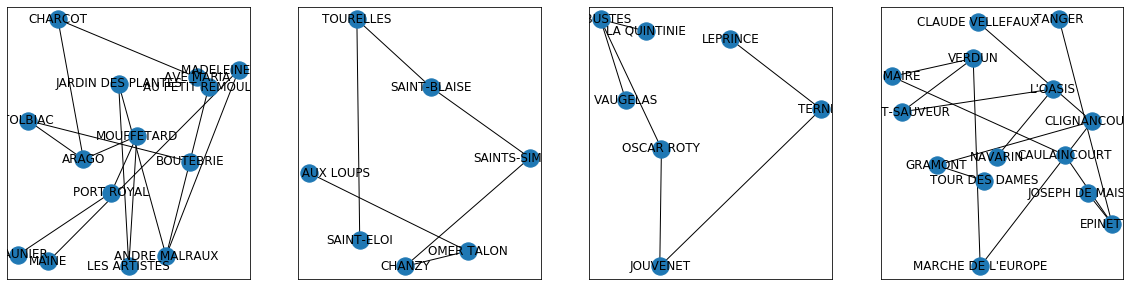

In [0]:
#minimum spanning tree of four graph based on traffic weight 

plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
A_spanning_tree=nx.minimum_spanning_tree(graph_car_A,algorithm='prim', weight='Weight' ) #using prims algorithm minimum spanning tree  A is obtained
nx.draw_networkx(A_spanning_tree,posA)  #drawing spanning tree A

#the rest is similar as first one 

plt.subplot(1,4,2)
B_spanning_tree=nx.minimum_spanning_tree(graph_car_B,algorithm='prim', weight='Weight' ) # obtaining spanning tree B 
nx.draw_networkx(B_spanning_tree,posB) #drawing spanning tree B 

plt.subplot(1,4,3)
C_spanning_tree=nx.minimum_spanning_tree(graph_car_C,algorithm='prim', weight='Weight' )  #obtaining spanning tree C 
nx.draw_networkx(C_spanning_tree,posC) #drawing spannign tree C 

plt.subplot(1,4,4)
D_spanning_tree=nx.minimum_spanning_tree(graph_car_D,algorithm='prim', weight='Weight' ) #obtaining spanning tree D
nx.draw_networkx(D_spanning_tree,posD) #drawing spanning tree D 

plt.show()

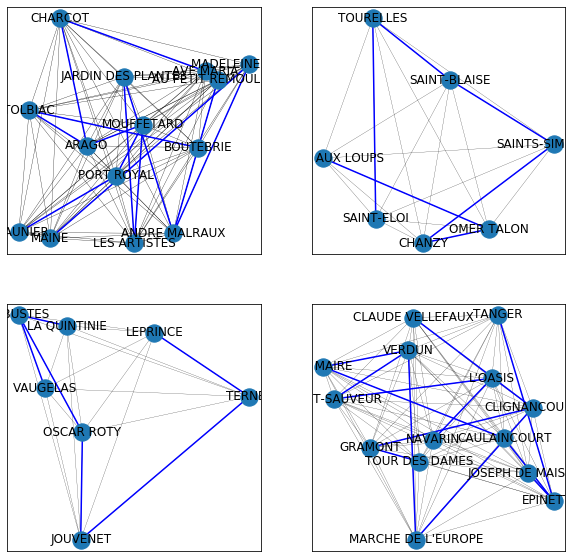

In [0]:
#visualising the graph with specific edges colored 

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
nx.draw_networkx_nodes(graph_car_A,posA)  #drawign all nodes of graph A 
nx.draw_networkx_edges(graph_car_A, posA, width=0.2 ) #drawing all edges with very thing width 
nx.draw_networkx_edges(graph_car_A, posA,edgelist=A_spanning_tree.edges(), edge_color='b',width=1.5) # specializing the edges of spanning tree with wider width and blue color 
nx.draw_networkx_labels(graph_car_A, posA) #drawing labels of nodes 

#the rest are the same as tree A

plt.subplot(2,2,2)
#posB = nx.spring_layout(graph_car_B)
nx.draw_networkx_nodes(graph_car_B,posB, with_labels=True) # drawing nodes with labels 
nx.draw_networkx_edges(graph_car_B, posB, width=0.2) #drawing all edges 
nx.draw_networkx_edges(graph_car_B, posB,edgelist=B_spanning_tree.edges(), width=1.5,edge_color='b') #drawing spanning tree with bigger width 
nx.draw_networkx_labels(graph_car_B, posB) #drawing labels

plt.subplot(2,2,3)

#posC = nx.spring_layout(graph_car_C)
nx.draw_networkx_nodes(graph_car_C, posC, with_labels=True) # drawing nodes with labels 
nx.draw_networkx_edges(graph_car_C, posC, width=0.2)  #drawing all edges 
nx.draw_networkx_edges(graph_car_C, posC,edgelist=C_spanning_tree.edges(), width=1.5,edge_color='b')#drawing spanning tree with bigger width 
nx.draw_networkx_labels(graph_car_C, posC) #drawing labels


plt.subplot(2,2,4)
#posD = nx.spring_layout(graph_car_D)
nx.draw_networkx_nodes(graph_car_D, posD, with_labels=True) # drawing nodes with labels 
nx.draw_networkx_edges(graph_car_D, posD, width=0.2) #drawing all edges 
nx.draw_networkx_edges(graph_car_D, posD , edgelist=D_spanning_tree.edges(),width=1.5, edge_color='b') #drawing spanning tree with bigger width 
nx.draw_networkx_labels(graph_car_D, posD ) #drawing labels
plt.show()

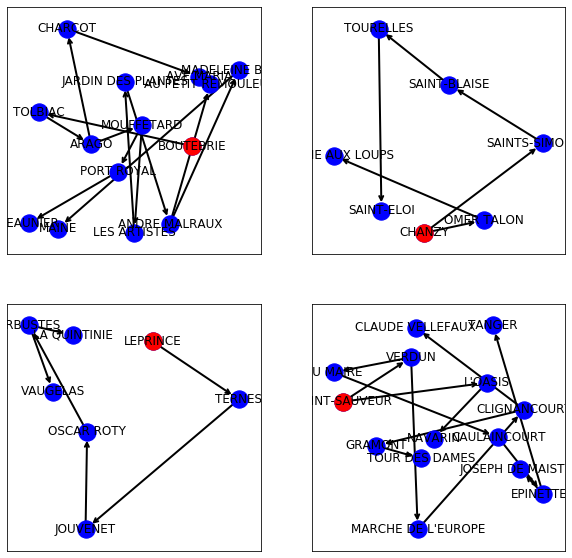

In [0]:
# visiting each restaurant using dfs traversal algorithm 

plt.figure(figsize=(10,10)) 
plt.subplot(2,2,1)
Tree_A=nx.dfs_tree(A_spanning_tree,source='BOUTEBRIE') # finding directed traversal graph using dfs algorithm, with giving spanning tree and source as arguments 
nx.draw_networkx_nodes(Tree_A, posA , node_color='blue') # drawing the nodes of traversal graph with blue color
nx.draw_networkx_nodes(Tree_A, posA , nodelist=['BOUTEBRIE'] , node_color='red') # emphisizing the starting node as red color 
nx.draw_networkx_edges(Tree_A, posA, arrowstyle='->',
                               arrowsize=10, edge_color='black', width=2) #drawing directed edges of graph with arrowstyle, color, size given 
nx.draw_networkx_labels(Tree_A,posA) #printing labels 


#the rest is the same as previous 
plt.subplot(2,2,2)
Tree_B=nx.dfs_tree(B_spanning_tree,source='CHANZY')  #finding traversal graph 
nx.draw_networkx_nodes(Tree_B, posB , node_color='blue') #drawing nodes with blue color 
nx.draw_networkx_nodes(Tree_B, posB , nodelist=['CHANZY'] , node_color='red') #start node with red 
nx.draw_networkx_edges(Tree_B, posB, arrowstyle='->',
                               arrowsize=10, edge_color='black', width=2) #drawign directed edges 
nx.draw_networkx_labels(Tree_B,posB) # labels

plt.subplot(2,2,3)
Tree_C=nx.dfs_tree(C_spanning_tree,source='LEPRINCE')  #finding traversal graph 
nx.draw_networkx_nodes(Tree_C, posC , node_color='blue')   #drawing nodes with blue color 
nx.draw_networkx_nodes(Tree_C, posC , nodelist=['LEPRINCE'] , node_color='red')  #start node with red
nx.draw_networkx_edges(Tree_C, posC, arrowstyle='->', arrowsize=10, edge_color='black', width=2) #drawign directed edges 
nx.draw_networkx_labels(Tree_C,posC)  # labels


plt.subplot(2,2,4)
Tree_D=nx.dfs_tree(D_spanning_tree,source='SAINT-SAUVEUR') #finding traversal graph 
nx.draw_networkx_nodes(Tree_D, posD , node_color='blue')    #drawing nodes with blue color
nx.draw_networkx_nodes(Tree_D, posD , nodelist=['SAINT-SAUVEUR'] , node_color='red')  #start node with red
nx.draw_networkx_edges(Tree_D, posD, arrowstyle='->', arrowsize=10, edge_color='black', width=2) #drawign directed edges 

nx.draw_networkx_labels(Tree_D,posD)  # labels
plt.show()



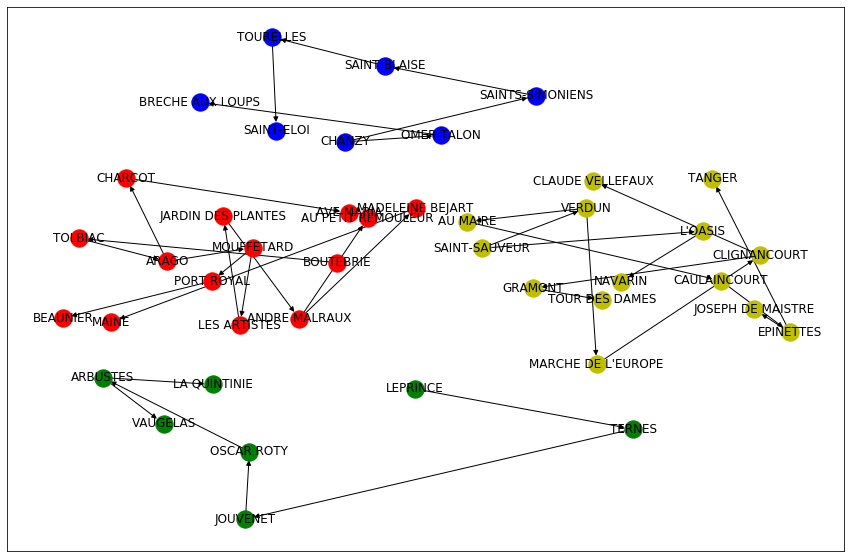

In [0]:
#drawing all clusters together 

plt.figure(figsize=(15,10))
nx.draw_networkx(Tree_A,posA, with_labels=True,node_color='r') #cluster A with red 
nx.draw_networkx(Tree_B,posB, with_labels=True,node_color='b') #cluster B with blue
nx.draw_networkx(Tree_C, posC,with_labels=True,node_color='g') #cluster C with green 
nx.draw_networkx(Tree_D,posD, with_labels=True,node_color='y') #cluster D with yellow
plt.show()

In [0]:
#finding average position to locate the base  
lst=[posA,posB,posC,posD] #listing all the positions of cluster 
#initializing variables 
x_avg=0   
y_avg=0
for i in lst:
  for j in i.keys():
    x_avg+=i[j][0]  # summing all x positions of restaurants 
    y_avg+=i[j][1] #summing all y positions of restaurats

#finding average by dividing to 42 
x_avg=x_avg/42 
y_avg=y_avg/42  

print(str(x_avg)+' '+str(y_avg))

488574.5092857143 23454.27


{'Base': [488574.5092857143, 23454.27]}


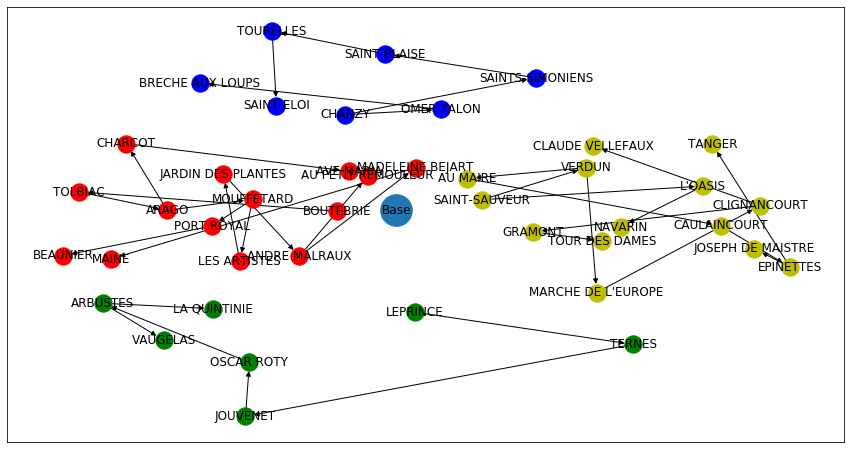

In [0]:
#assuming food is provided from origin 
origin=nx.Graph()    #creating graph to locate warehouse ,  p.s: warehouse = base 
posBase={'Base':[x_avg,y_avg]}  #creating dictionary , with name of base as key , list of coordinates of base as values ,as we did for all clusters  
origin.add_node('Base',add_dict=posBase) #adding base to our new graph , with coordinates given as attributes  

plt.figure(figsize=(15 ,8))
print(posBase)

#drawing all all cluster with different colors as before 
nx.draw_networkx(Tree_A,posA, with_labels=True,node_color='r') 
nx.draw_networkx(Tree_B,posB, with_labels=True,node_color='b')  
nx.draw_networkx(Tree_C, posC,with_labels=True,node_color='g') 
nx.draw_networkx(Tree_D,posD, with_labels=True,node_color='y') 

nx.draw_networkx(origin,posBase,node_size=1000) #drawing our base in this network with bigger size 
plt.show()



In [0]:
#finding 4 close restaurant to start providing food

starting_nodes={} # creating dictionary to store restaurants' name as keys, distance as value  
for i in lst:  #analysing each cluster one by one, lst= [posA,posB,posC,posD]
  dist=100000000  # very big number , we need find smallest 
  for j in i.keys(): #analysing each node one by one in each cluster 

    temp= math.sqrt(math.pow(posBase['Base'][0]-i[j][0],2)+math.pow(posBase['Base'][1]-i[j][1],2)) # calculating distance simple mathematical equation 
    if temp < dist: 
      dist=temp #assigning smallest distance 
      name=j #storing the name restaurant 
  starting_nodes[name]=dist # storing the name and distance in dictionary 
 
print(starting_nodes)

{'BOUTEBRIE': 58.386827530525125, 'CHANZY': 374.38783153370554, 'LEPRINCE': 396.8714527766934, 'SAINT-SAUVEUR': 93.95323099712691}


In [0]:
#adding these nodes to graph 

#adding these restaurants to our new graph with positions given as arguments 
origin.add_node('BOUTEBRIE', pos=posA['BOUTEBRIE']) # BOUTEBRIE is in cluster A
origin.add_node('CHANZY', pos=posB['CHANZY'])  #CHANZY is in cluster B    
origin.add_node('LEPRINCE', pos=posC['LEPRINCE']) #LEPRINCE is in cluster C
origin.add_node('SAINT-SAUVEUR', pos=posD['SAINT-SAUVEUR']) # SAINT-SAUVEUR  is in cluster D 


#creating edges from base to starting nodes 
origin.add_edge('Base','BOUTEBRIE',)
origin.add_edge('Base','CHANZY')
origin.add_edge('Base','LEPRINCE')
origin.add_edge('Base','SAINT-SAUVEUR')

#adding position of all starting nodes to dictionary 
posBase['BOUTEBRIE']=posA['BOUTEBRIE']
posBase['CHANZY']=posB['CHANZY']
posBase['LEPRINCE']=posC['LEPRINCE']
posBase['SAINT-SAUVEUR']=posD['SAINT-SAUVEUR']
plt.show() 


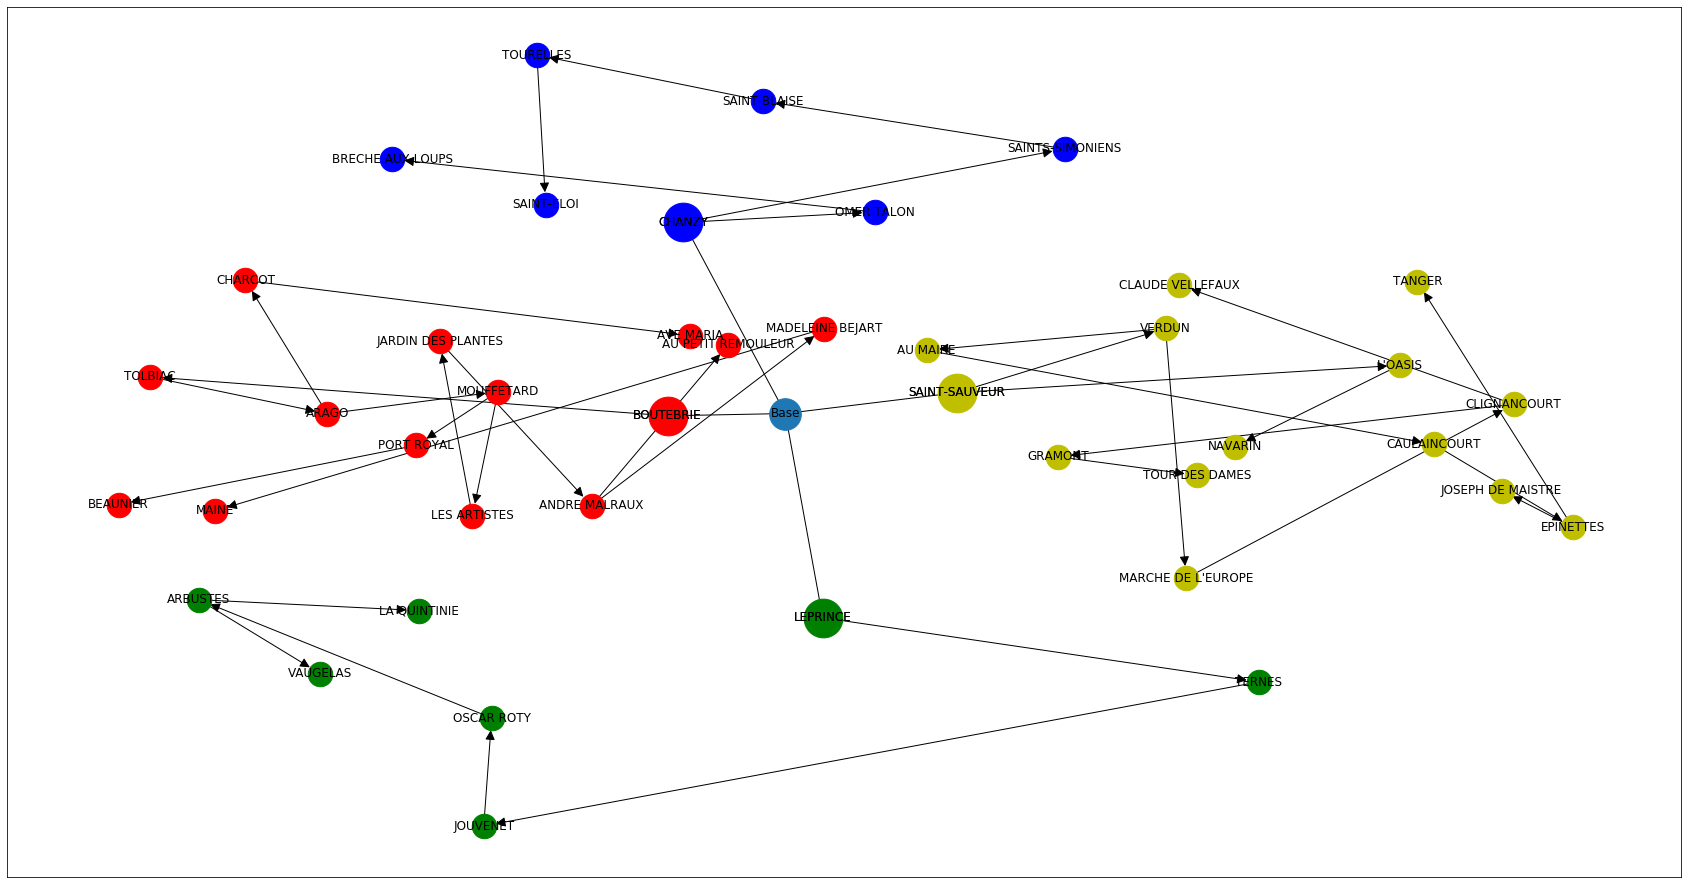

In [0]:
plt.figure(figsize=(30,16))
#drawing clusters with different colors
nx.draw_networkx(Tree_A,posA, with_labels=True,node_color='r',node_size=600,arrowsize=20)
nx.draw_networkx(Tree_B,posB, with_labels=True,node_color='b',node_size=600,arrowsize=20)
nx.draw_networkx(Tree_C, posC,with_labels=True,node_color='g',node_size=600,arrowsize=20)
nx.draw_networkx(Tree_D,posD, with_labels=True,node_color='y',node_size=600,arrowsize=20)

nx.draw_networkx(origin,posBase,node_size=1000) #drawing nodes,edge of graph origin, inculding starting nodes

#drawing starting nodes with bigger size, and color respective to their cluster 
nx.draw_networkx_nodes(Tree_A, posA , nodelist=['BOUTEBRIE'] , node_color='r',node_size=1500)
nx.draw_networkx_nodes(Tree_B, posB , nodelist=['CHANZY'] , node_color='b',node_size=1500)
nx.draw_networkx_nodes(Tree_C, posC , nodelist=['LEPRINCE'] , node_color='g',node_size=1500)
nx.draw_networkx_nodes(Tree_D, posD , nodelist=['SAINT-SAUVEUR'] , node_color='y',node_size=1500)


plt.show()
